# EDA

In [1]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing training data

In [2]:
df=pd.read_csv("train_0OECtn8.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train_0OECtn8.csv'

In [ ]:
df.dtypes

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

### Checking for missing values and outliers


In [ ]:
#null values
df.isna().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [ ]:
#  cheking outliers
df.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


Data looks clean
Hence no outliers present

In [ ]:
df.nunique()

row_id              89197
user_id             27734
category_id            47
video_id              175
age                    58
gender                  2
profession              3
followers              17
views                  43
engagement_score      229
dtype: int64

## Uni-variate Analysis

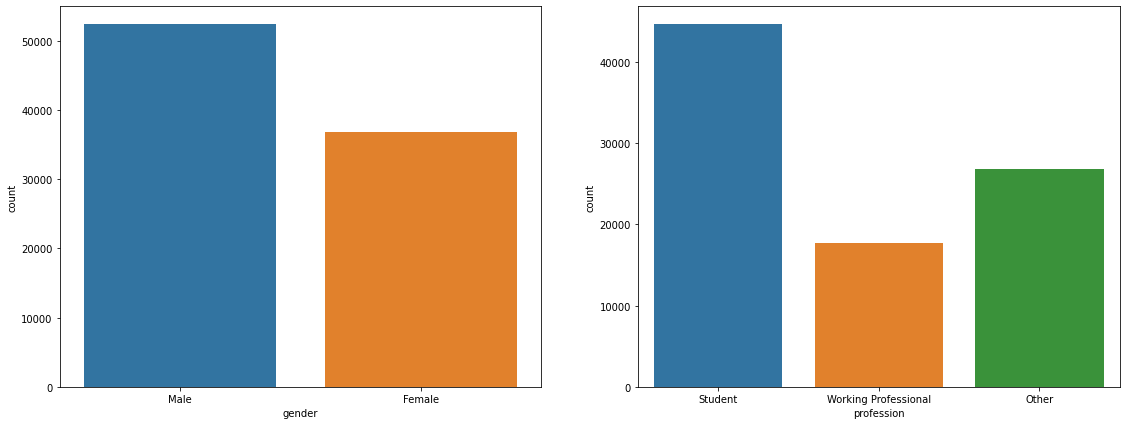

In [ ]:
# how the gender and profession in the dataset distributed


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19,7))
sns.countplot(x='gender',data=df,ax=ax[0])
sns.countplot(x='profession',data=df,ax=ax[1])

plt.show()

Males and students are more interactive with the platform

[Gender- Male = 58% , Female 42%] [ Professional - Student 50% , Other 30 % , Working Professional 20 % ]

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


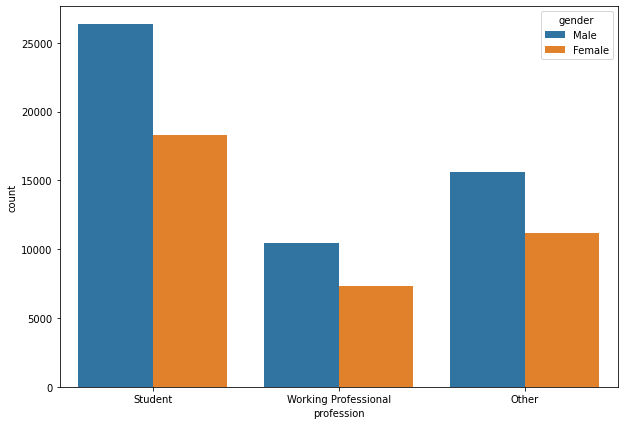

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(df["profession"],hue=df["gender"])
plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


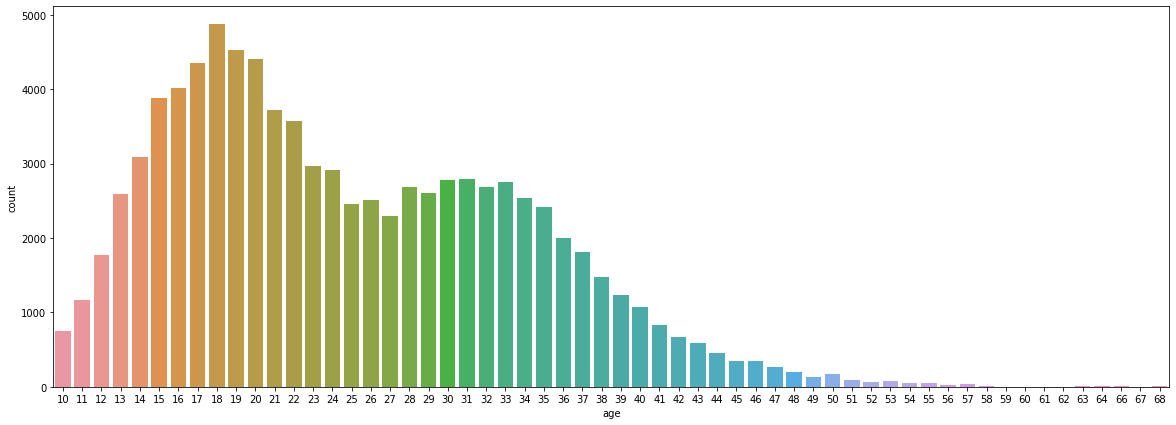

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(df["age"])
plt.show()

15-21 age group are most active in platform

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


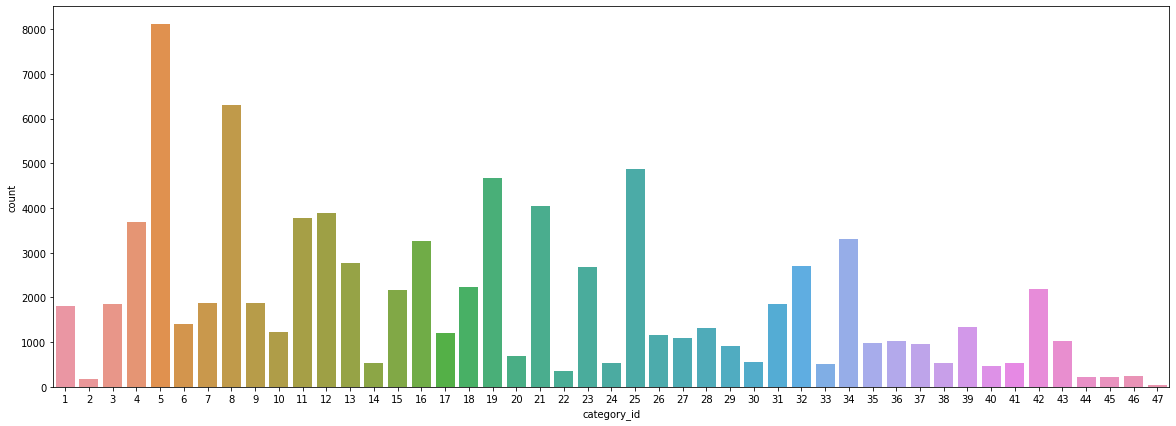

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(df["category_id"])
plt.show()

People mostly interact with category 5 videos

## Bi-variate Analysis

<AxesSubplot:>

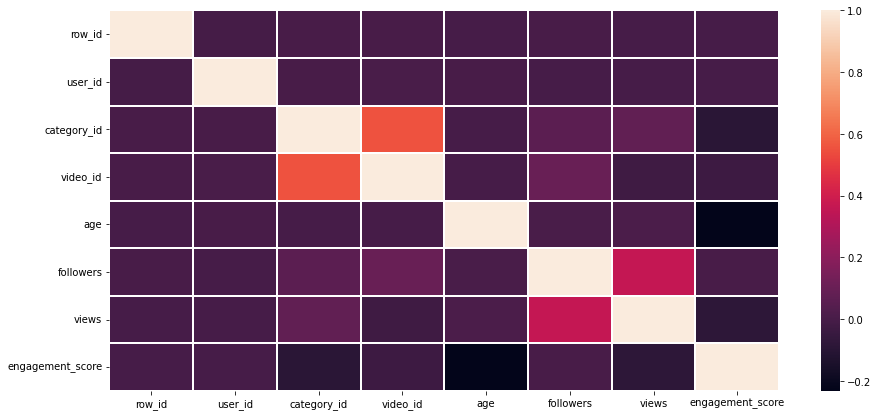

In [ ]:
plt.figure(figsize=(15,7))
numerical = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numerical.corr(), linewidths=2)

video id and category id are correlated 

and views and followers are also correlated

so we can remove views and video id

Text(0.5, 1.0, 'Comparing age with engagement score by the gender ')

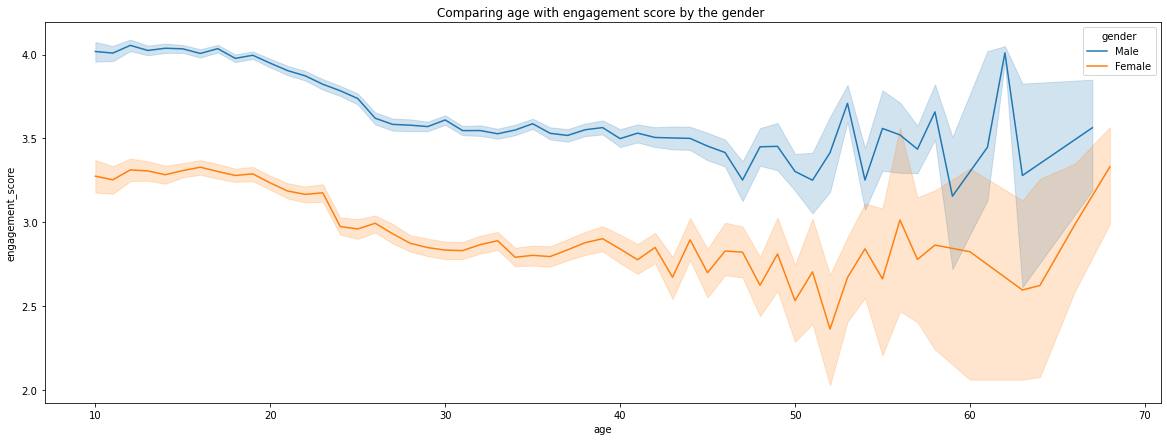

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="age",y="engagement_score",hue="gender")
plt.title("Comparing age with engagement score by the gender ")

engagement score has great influence from age by gender upto age of 40

Text(0.5, 1.0, 'Comparing age with engagement score by the profession ')

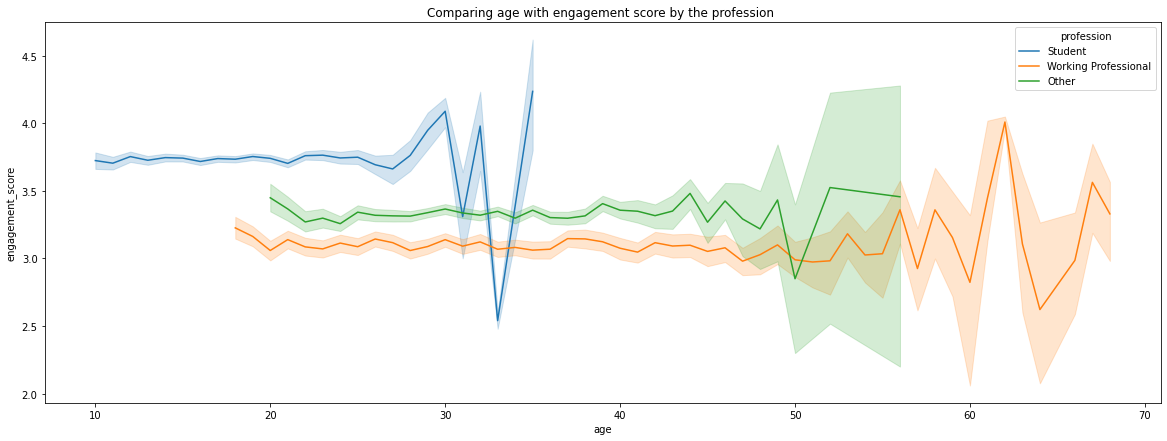

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="age",y="engagement_score",hue="profession")
plt.title("Comparing age with engagement score by the profession ")

Text(0.5, 1.0, 'Comparing category_id with engagement score')

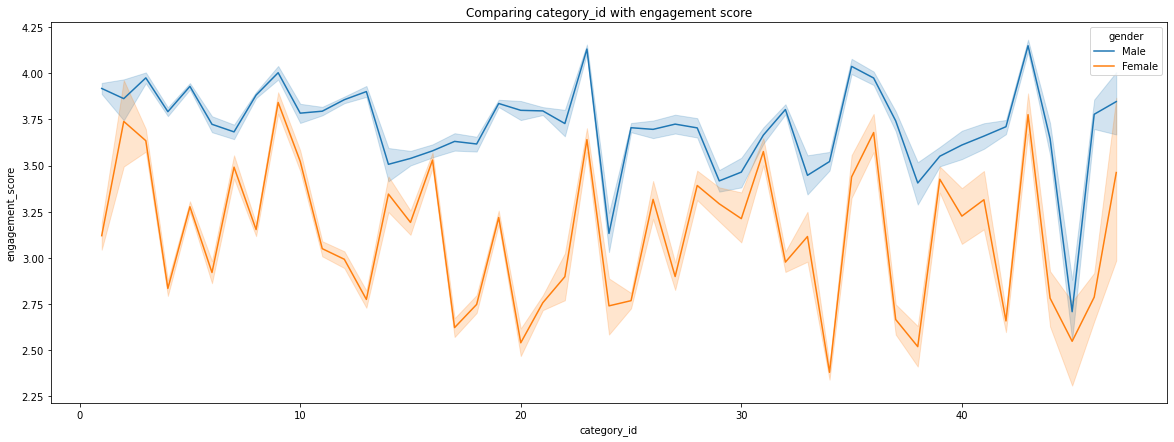

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="category_id",y="engagement_score", hue="gender")
plt.title("Comparing category_id with engagement score")

Text(0.5, 1.0, 'Comparing followers with engagement score')

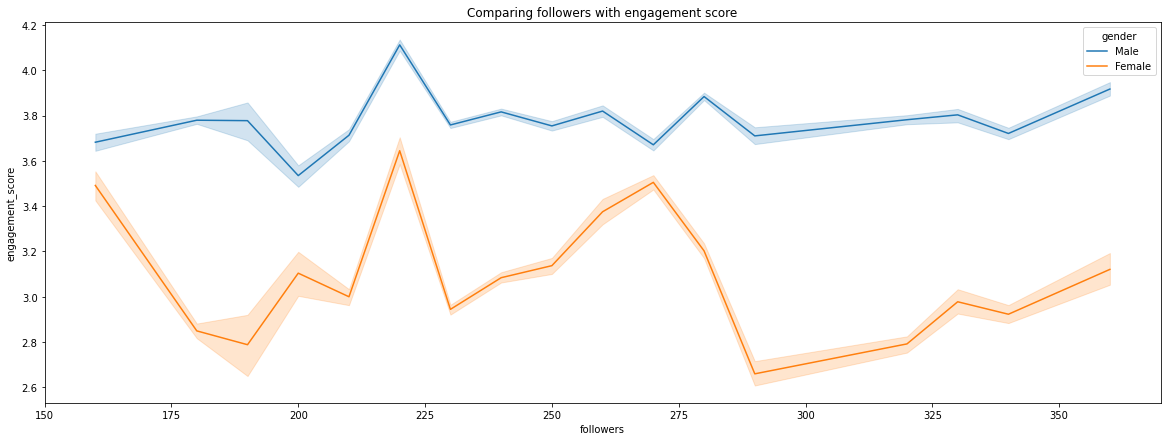

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="followers",y="engagement_score", hue='gender')
plt.title("Comparing followers with engagement score")

__________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________

# Model Fitting

Pre-processing

In [ ]:
df = pd.get_dummies(df)
df.head()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,1,19990,37,128,24,180,1000,4.33,0,1,0,1,0
1,2,5304,32,132,14,330,714,1.79,1,0,0,1,0
2,3,1840,12,24,19,180,138,4.35,0,1,0,1,0
3,4,12597,23,112,19,220,613,3.77,0,1,0,1,0
4,5,13626,23,112,27,220,613,3.13,0,1,0,0,1


As given in problem we have to avoid row id for fitting data in all models

Since we found high correlation between Video_id and Category_id and also between views and followers so discarded one of them to consider all independent features

In [ ]:
features = df.drop(['row_id','video_id','views',], axis=1).columns
list(features)

['user_id',
 'category_id',
 'age',
 'followers',
 'engagement_score',
 'gender_Female',
 'gender_Male',
 'profession_Other',
 'profession_Student',
 'profession_Working Professional']

In [ ]:
mdf = df[features]

Segregating the Data

In [ ]:
x = mdf.drop(['engagement_score'], axis=1)
y = mdf['engagement_score']
x.head()

,user_id,category_id,age,followers,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,19990,37,24,180,0,1,0,1,0
1,5304,32,14,330,1,0,0,1,0
2,1840,12,19,180,0,1,0,1,0
3,12597,23,19,220,0,1,0,1,0
4,13626,23,27,220,0,1,0,0,1


Splitting data temporarly to test and train just to see models performaces

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=5, stratify=y)

# KNN

from cross validation no. of neighbours = 1

not a good model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNN
rgr = KNN(n_neighbors=5)

rgr.fit(x_train, y_train)
test_predict_rgr = rgr.predict(x_test)

rgr.score(x_test, y_test)


0.020549075207330847

In [ ]:
Error_knn=pd.DataFrame({
    'Predicted' : test_predict_rgr,
    'Actual' : y_test
})
Error_knn['Residual']=Error_knn['Predicted']-Error_knn['Actual']

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression as LR
lr=LR(normalize=True)

lr.fit(x_train, y_train)
test_predict_lr = lr.predict(x_test)

lr.score(x_test, y_test)

0.2650891897689468

Text(0, 0.5, 'LR coefficients')

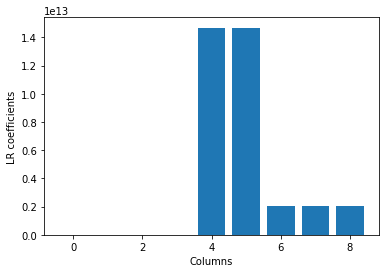

In [ ]:
plt.bar(range(len(x_train.columns)), lr.coef_)
plt.xlabel("Columns")
plt.ylabel("LR coefficients")

In [ ]:
Error_lr=pd.DataFrame({
    'Predicted' : test_predict_lr,
    'Actual' : y_test
})
Error_lr['Residual']=Error_lr['Predicted']-Error_lr['Actual']

# Decision Tree

from k-fold cross validation optimum performance is at

max depth = 9

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=9)

dtr.fit(x_train, y_train)
test_predict_dtr = dtr.predict(x_test)

dtr.score(x_test, y_test)

0.3323611527892516

In [ ]:
Error_dtr=pd.DataFrame({
    'Predicted' : test_predict_dtr,
    'Actual' : y_test
})
Error_dtr['Residual']=Error_dtr['Predicted']-Error_dtr['Actual']

# Random Forest

from k-fold cross validation we get optimum performance at 

n_estimators >=120 its almost saturated

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=130)

rf.fit(x_train, y_train)
test_predict_rf = rf.predict(x_test)

rf.score(x_test, y_test)

0.4153862673299952

In [ ]:
Error_rf=pd.DataFrame({
    'Predicted' : test_predict_rf,
    'Actual' : y_test
})
Error_rf['Residual']=Error_rf['Predicted']-Error_rf['Actual']

# XG Boost

from k-fold cross validation we get optimum performance of XGBoost at 

max depth = 10,

and n_estimators = 450

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=450, max_depth=10)
xgb.fit(x_train, y_train)
test_predict_xgb = xgb.predict(x_test)

xgb.score(x_test, y_test)

0.4261536681613459

In [ ]:
Error_xgb=pd.DataFrame({
    'Predicted' : test_predict_xgb,
    'Actual' : y_test
})
Error_xgb['Residual']=Error_xgb['Predicted']-Error_xgb['Actual']

# Ensembling different models

In [ ]:
xgb.score(x_test, y_test), rf.score(x_test, y_test), dtr.score(x_test, y_test), lr.score(x_test, y_test), rgr.score(x_test, y_test)

(0.4261536681613459,
 0.4153862673299952,
 0.3323611527892516,
 0.2650891897689468,
 0.020549075207330847)

In [ ]:
test_predict= (5*test_predict_xgb+2.76*test_predict_rf+0.64*test_predict_dtr+0.8*test_predict_lr+0.8*test_predict_rgr)/10
from sklearn.metrics import r2_score

r2=r2_score(y_test, test_predict)
r2

ValueError: Found input variables with inconsistent numbers of samples: [22300, 11121]

In [ ]:
Error=pd.DataFrame({
    'Predicted' : test_predict,
    'Actual' : y_test
})
Error['Residual']=Error['Predicted']-Error['Actual']

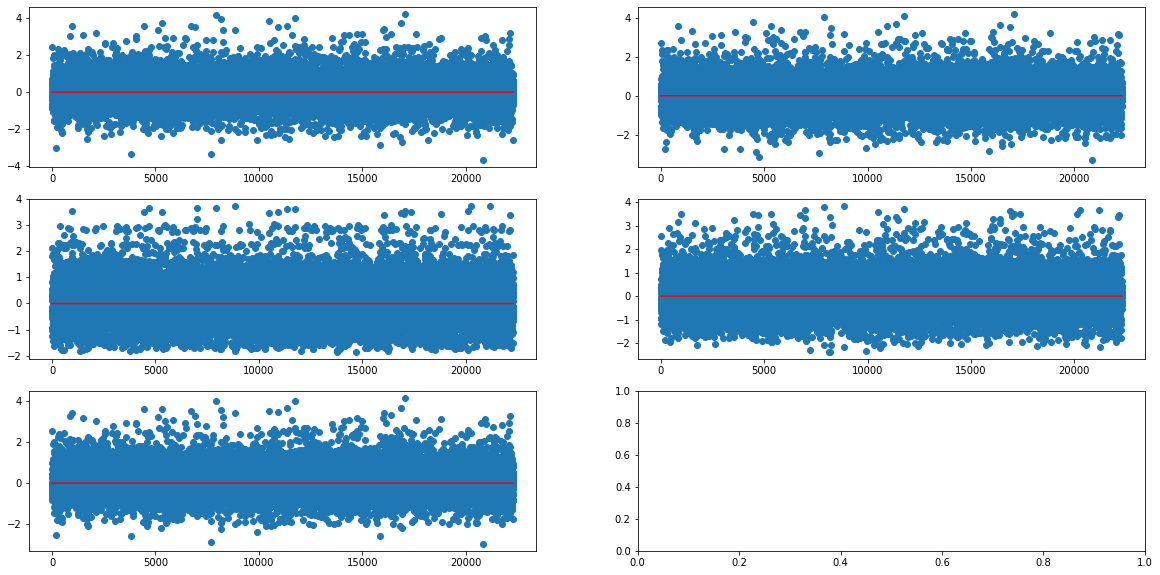

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20,10))
zero= [0 for i in range(len(Error.Residual))]


ax[0][0].scatter(range(len(Error_xgb.Residual)), Error_xgb.Residual)
ax[0][0].plot(range(len(Error.Residual)), zero, color='red')
ax[0][1].scatter(range(len(Error_rf.Residual)), Error_rf.Residual)
ax[0][1].plot(range(len(Error.Residual)), zero, color='red')
ax[1][0].scatter(range(len(Error_lr.Residual)), Error_lr.Residual)
ax[1][0].plot(range(len(Error.Residual)), zero, color='red')
ax[1][1].scatter(range(len(Error_dtr.Residual)), Error_dtr.Residual)
ax[1][1].plot(range(len(Error.Residual)), zero, color='red')
ax[2][0].scatter(range(len(Error.Residual)), Error.Residual)
ax[2][0].plot(range(len(Error.Residual)), zero, color='red')

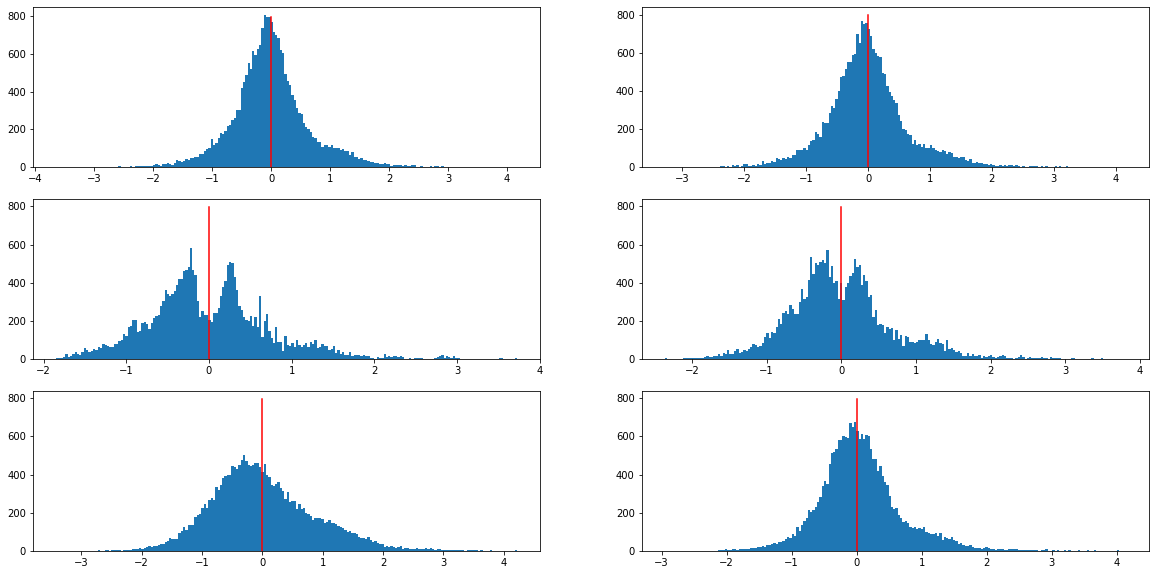

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20,10))
zero= [0 for i in range(0,800)]
yzero = [i for i in range(0,800)]

ax[0][0].hist(Error_xgb.Residual, bins=200)
ax[0][0].plot(zero, yzero, color='red',)
ax[0][1].hist(Error_rf.Residual, bins=200)
ax[0][1].plot(zero, yzero, color='red',)
ax[1][0].hist(Error_lr.Residual, bins=200)
ax[1][0].plot(zero, yzero, color='red',)
ax[1][1].hist(Error_dtr.Residual, bins=200)
ax[1][1].plot(zero, yzero, color='red',)
ax[2][0].hist(Error_knn.Residual, bins=200)
ax[2][0].plot(zero, yzero, color='red',)
ax[2][1].hist(Error.Residual, bins=200)
ax[2][1].plot(zero, yzero, color='red',)

# K fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
def k_fold(k):
    scores=[]

    for i in k:
        score = cross_val_score(DecisionTreeRegressor(max_depth=i), x, y, cv=10,scoring='r2')
        scores.append(score.mean())
    return scores

In [ ]:
# k=range(9,11)
# y_plot = k_fold(k)

In [ ]:
# y_plot

In [ ]:
# plt.plot(k,y_plot)

# Implementing on Test data

In [ ]:
df_test=pd.read_csv("test__86Ljaj8.csv")
df_test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [ ]:
df_test = pd.get_dummies(df_test)
df_test.head()

,row_id,user_id,category_id,video_id,age,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,89198,7986,12,42,14,180,138,0,1,0,1,0
1,89199,11278,34,115,14,230,840,0,1,0,1,0
2,89200,17245,8,110,44,280,628,1,0,0,0,1
3,89201,9851,16,137,18,270,462,0,1,0,1,0
4,89202,16008,34,96,47,230,840,1,0,1,0,0


In [ ]:
features_test = df_test.drop(['row_id','video_id','views'], axis=1).columns
list(features_test)

['user_id',
 'category_id',
 'age',
 'followers',
 'gender_Female',
 'gender_Male',
 'profession_Other',
 'profession_Student',
 'profession_Working Professional']

In [ ]:
mdf_test = df_test[features_test]

## Models

### XG Boost

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=450, max_depth=10)
xgb.fit(x, y)
test_predict_xgb = xgb.predict(mdf_test)

xgb.score(x, y)

0.8220989721584314

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=130)

rf.fit(x, y)
test_predict_rf = rf.predict(mdf_test)

rf.score(x, y)

0.8484056705962232

### Decesion Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=9)

dtr.fit(x, y)
test_predict_dtr = dtr.predict(mdf_test)

dtr.score(x, y)

0.3632792662135913

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression as LR
lr=LR(normalize=True)

lr.fit(x, y)
test_predict_lr = lr.predict(mdf_test)

lr.score(x, y)

0.267578393272461

### KNN 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNN
rgr = KNN(n_neighbors=5)

rgr.fit(x, y)
test_predict_rgr = rgr.predict(mdf_test)

rgr.score(x, y)

0.4066025109654948

# Output

In [ ]:
fil = pd.read_csv("fil.csv")
fil['row_id']=df_test['row_id']
fil["engagement_score"] = ((5*test_predict_xgb+2.76*test_predict_rf+0.64*test_predict_dtr+0.8*test_predict_lr+0.8*test_predict_rgr)/10)
df = pd.DataFrame(fil,columns=['row_id','engagement_score'])
df.to_csv(r"C:\Users\ASUS\Downloads\Fractal Imagineer Programme\Projects\Hackathon\aayush.csv",index=False)